# Four Peaks

In [1]:
pwd

'/Users/ssandesh/ML_Gatech/Project2'

In [8]:
#pip install mlrose-hiive <-- had to do it the first time 

In [49]:
import numpy as np
import pandas as pd
import mlrose_hiive
import matplotlib.pyplot as plt
import time as tm

# Problem Length and Best Fitness 

In [50]:
# Documentation Refernce:: 
# 1. https://mlrose.readthedocs.io/en/stable/
# 2. https://mlrose.readthedocs.io/en/stable/source/fitness.html
# 3. https://mlrose.readthedocs.io/en/stable/source/intro.html
# 4. https://mlrose.readthedocs.io/en/stable/_modules/mlrose/algorithms.html

In [51]:
# Four Peaks
# As per the assignment, "Please note that the problems you create should be over discrete-valued parameter spaces"
# so using the DiscreteOpt
# https://mlrose.readthedocs.io/en/stable/source/tutorial1.html
fitness = mlrose_hiive.FourPeaks()
random_state = 7
problem_length_array = range(1, 250, 25)
rhc_stats_1 = []
sa_stats_1 = []
ga_stats_1  = []
mimic_stats_1 = []
max_attempts_1 = 10
max_iters = 100

for problem_length in problem_length_array:
    ## Random Hill Climb
    
    problem = mlrose_hiive.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True)
   
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                  max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats_1.append((problem_length,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats_1.append((problem_length,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=50, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats_1.append((problem_length,ga_best_fitness,ga_time))
    
    # MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=50, keep_pct=0.5, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats_1.append((problem_length,mimic_best_fitness,mimic_time))

In [55]:
rhc_stats_1 = np.array(rhc_stats_1)
sa_stats_1 = np.array(sa_stats_1)
ga_stats_1 = np.array(ga_stats_1)
mimic_stats_1 = np.array(mimic_stats_1)

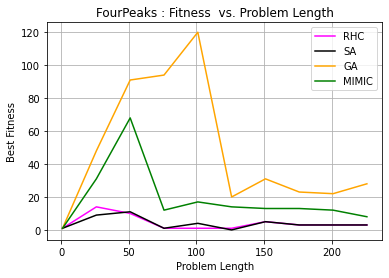

In [76]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[1]],  label='RHC', color='magenta')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[1]],  label='SA', color='black')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[1]],  label='MIMIC', color='green')
plt.title('FourPeaks : Fitness  vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Best Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()

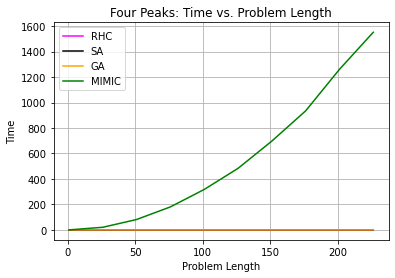

In [83]:
plt.figure()
plt.plot(rhc_stats_1[:,[0]], rhc_stats_1[:,[2]],  label='RHC', color='magenta')
plt.plot(sa_stats_1[:,[0]], sa_stats_1[:,[2]],  label='SA', color='black')
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[2]],  label='MIMIC', color='green')
plt.title('Four Peaks: Time vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

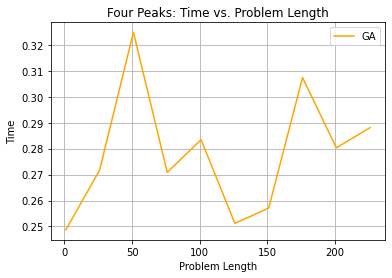

In [84]:
plt.figure()
plt.plot(ga_stats_1[:,[0]], ga_stats_1[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats_1[:,[0]], mimic_stats_1[:,[2]],  label='MIMIC', color='green')
plt.title('Four Peaks: Time vs. Problem Length')
plt.xlabel('Problem Length')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

## Modifying Max Iterations 

In [62]:
fitness = mlrose_hiive.FourPeaks()
random_state = 7
max_iters_array = range(5, 500, 25 )
rhc_stats = []
sa_stats = []
ga_stats  = []
mimic_stats = []
max_attempts = 100
problem_length = 75
problem = mlrose_hiive.DiscreteOpt(length=problem_length, fitness_fn=fitness, maximize=True)

for max_iters in max_iters_array:
    ## Random Hill Climb
    start_time = tm.time()
    rhc_best_state, rhc_best_fitness,_ = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    rhc_time = end_time - start_time
    rhc_stats.append((max_iters,rhc_best_fitness,rhc_time))
    
    # Simulated Annealing
    # Define decay schedule
    schedule = mlrose_hiive.ExpDecay()
    start_time = tm.time()
    sa_best_state, sa_best_fitness,_  = mlrose_hiive.simulated_annealing(problem, schedule = schedule,
                                                      max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=False, random_state = random_state)
    end_time = tm.time()
    sa_time = end_time - start_time
    sa_stats.append((max_iters,sa_best_fitness,sa_time))
    
    # Genetic Algorithm
    start_time = tm.time()
    ga_best_state, ga_best_fitness,_ = mlrose_hiive.genetic_alg(problem, pop_size=200, mutation_prob=0.5, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    ga_time = end_time - start_time
    ga_stats.append((max_iters,ga_best_fitness,ga_time))
    
    # MIMIC
    start_time = tm.time()
    mimic_best_state, mimic_best_fitness,_ = mlrose_hiive.mimic(problem, pop_size=200, keep_pct=0.1, 
                                                                max_attempts=max_attempts,max_iters=max_iters, 
                                                                curve=False, random_state=random_state)
    end_time = tm.time()
    mimic_time = end_time - start_time
    mimic_stats.append((max_iters,mimic_best_fitness,mimic_time))

In [73]:
rhc_stats = np.array(rhc_stats)
sa_stats = np.array(sa_stats)
ga_stats = np.array(ga_stats)
mimic_stats = np.array(mimic_stats)

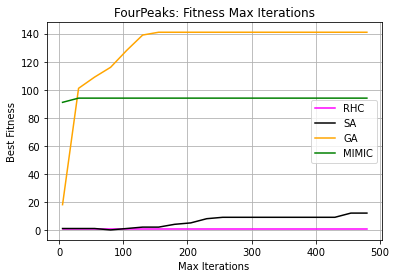

In [75]:
plt.figure()
plt.plot(rhc_stats[:,[0]], rhc_stats[:,[1]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[1]],  label='SA', color='black')
plt.plot(ga_stats[:,[0]], ga_stats[:,[1]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]],mimic_stats[:,[1]],  label='MIMIC', color='green')
plt.title('FourPeaks: Fitness Max Iterations')
plt.xlabel('Max Iterations ')
plt.ylabel("Best Fitness")
plt.legend(loc="best")
plt.grid()
plt.show()

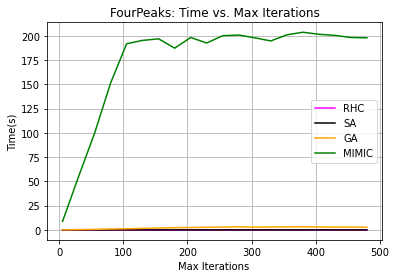

In [85]:
plt.figure()
plt.plot(rhc_stats[:,[0]], rhc_stats[:,[2]],  label='RHC', color='magenta')
plt.plot(sa_stats[:,[0]], sa_stats[:,[2]],  label='SA', color='black')
plt.plot(ga_stats[:,[0]], ga_stats[:,[2]],  label='GA', color='orange')
plt.plot(mimic_stats[:,[0]],mimic_stats[:,[2]],  label='MIMIC', color='green')
plt.title('FourPeaks: Time vs. Max Iterations')
plt.xlabel('Max Iterations ')
plt.ylabel("Time(s)")
plt.legend(loc="best")
plt.grid()
plt.show()

## Hyper parameter tuning sections

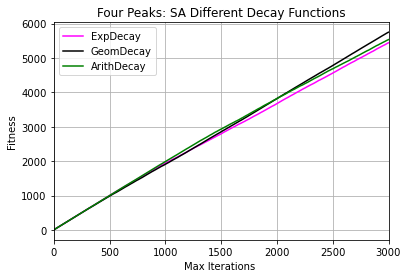

In [82]:
# as the problem size is increased the Geom and Arith switch back and forth between the fitness scores,
# howerver, with the problem size of 100 and the smaller decay Geo performs better. Exp perfomrs stas between the
# two above mentioned. 

fitness = mlrose_hiive.FourPeaks(t_pct=0.1)
problem = mlrose_hiive.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)
random_state = 7
schedule = mlrose_hiive.ExpDecay(init_temp=10, exp_const=0.005, min_temp=1)
sa_best_state, sa_best_fitness_exp,sa_best_fitness_curve_exp  = mlrose_hiive.simulated_annealing(
                                                                    problem, schedule = schedule,
                                                                    max_attempts = 100, max_iters = 3000,
                                                                    curve=True, random_state = random_state)

schedule=mlrose_hiive.GeomDecay(init_temp=10, decay=0.01 , min_temp=1)
sa_best_state, sa_best_fitness_geom,sa_best_fitness_curve_geom  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 3000,
                                                                        curve=True, random_state = random_state)

schedule=mlrose_hiive.ArithDecay(init_temp=10, decay=0.010, min_temp=1)
sa_best_state, sa_best_fitness_arith,sa_best_fitness_curve_arith  = mlrose_hiive.simulated_annealing(
                                                                        problem, schedule = schedule,
                                                                        max_attempts = 100, max_iters = 3000,
                                                                        curve=True, random_state = random_state)

plt.figure()
plt.plot( sa_best_fitness_curve_exp[:,[1]],  label='ExpDecay', color='magenta')
plt.plot(sa_best_fitness_curve_geom[:,[1]],  label='GeomDecay', color='black')
plt.plot(sa_best_fitness_curve_arith[:,[1]] ,  label='ArithDecay', color='green')
plt.title('Four Peaks: SA Different Decay Functions')
plt.xlabel('Max Iterations ')
plt.ylabel("Fitness")
plt.xlim([0, 3000])
plt.legend(loc="best")
plt.grid()
plt.show()


In [52]:
# RHC
# changing the restart parameter
random_state = 7
fitness = mlrose_hiive.FourPeaks()
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_0 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 0,  random_state = random_state)

rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_4 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 4,  random_state = random_state)


rhc_best_state_2, rhc_best_fitness_2, rhc_best_fitness_curve_8 = mlrose_hiive.random_hill_climb(problem,
                                                   max_attempts = max_attempts, max_iters = max_iters,
                                                      curve=True, restarts = 8,  random_state = random_state)


In [ ]:
# GA population size

In [69]:
random_state = 7
fitness = mlrose_hiive.FourPeaks()
# starting at 15 since there are 12 edges so we need more than that 
max_attempts = 100
max_iters = 1000
time_diff = [0,0,0]
problem = mlrose_hiive.DiscreteOpt(length=75, fitness_fn=fitness, maximize=True)

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_5,ga_best_fitness_curve_50 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=50, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[0] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_200,ga_best_fitness_curve_200 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=200, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                                curve=True, random_state=random_state)
end_time = tm.time()
time_diff[1] = end_time - start_time

start_time = tm.time()
ga_best_state_2, ga_best_fitness_2_500,ga_best_fitness_curve_500 = mlrose_hiive.genetic_alg(problem, 
                                                                pop_size=500, mutation_prob=0.2, 
                                                                max_attempts=max_attempts, max_iters=max_iters, 
                                                               curve=True, random_state=random_state)
end_time = tm.time()
time_diff[2] = end_time - start_time

In [70]:
print(ga_best_fitness_2_5)
print(ga_best_fitness_2_200)
print(ga_best_fitness_2_500)
print(time_diff)

75.0
141.0
141.0
[1.704693078994751, 2.8147308826446533, 6.298289775848389]
